In [1]:
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
from scipy.fft import fft
%matplotlib inline

In [2]:
parent_dir = os.path.abspath(r'../data/')
output_dir = os.path.join(parent_dir, 'processed_data', 'ModelingData')

big_train_path = os.path.join(output_dir, 'big_train.parquet')
big_train_df = pd.read_parquet(big_train_path)

big_test_path = os.path.join(output_dir, 'big_test.parquet')
big_test_df = pd.read_parquet(big_test_path)



In [4]:
columns_to_drop = [
    'wind_speed_mean', 'yaw_error_mean', 'Turbulence',
    'tip_deflection_edge_V1_mean', 'tip_deflection_edge_V2_mean',
    'tip_deflection_edge_V3_mean', 'tip_deflection_flap_V1_mean',
    'tip_deflection_flap_V2_mean', 'tip_deflection_flap_V3_mean',
    'tower_deflection_Y_mean', 'tower_deflection_Z_mean',
    'wind_speed_max', 'wind_speed_median', 'wind_speed_min',
    'wind_speed_q1', 'wind_speed_q3', 'wind_speed_std',
    'yaw_error_max', 'yaw_error_median', 'yaw_error_min',
    'yaw_error_q1', 'yaw_error_q3', 'yaw_error_std',
    'tip_deflection_edge_V1_max', 'tip_deflection_edge_V1_median',
    'tip_deflection_edge_V1_min', 'tip_deflection_edge_V1_q1',
    'tip_deflection_edge_V1_q3', 'tip_deflection_edge_V1_std',
    'tip_deflection_edge_V2_max', 'tip_deflection_edge_V2_median',
    'tip_deflection_edge_V2_min', 'tip_deflection_edge_V2_q1',
    'tip_deflection_edge_V2_q3', 'tip_deflection_edge_V2_std',
    'tip_deflection_edge_V3_max', 'tip_deflection_edge_V3_median',
    'tip_deflection_edge_V3_min', 'tip_deflection_edge_V3_q1',
    'tip_deflection_edge_V3_q3', 'tip_deflection_edge_V3_std',
    'tip_deflection_flap_V1_max', 'tip_deflection_flap_V1_median',
    'tip_deflection_flap_V1_min', 'tip_deflection_flap_V1_q1',
    'tip_deflection_flap_V1_q3', 'tip_deflection_flap_V1_std',
    'tip_deflection_flap_V2_max', 'tip_deflection_flap_V2_median',
    'tip_deflection_flap_V2_min', 'tip_deflection_flap_V2_q1',
    'tip_deflection_flap_V2_q3', 'tip_deflection_flap_V2_std',
    'tip_deflection_flap_V3_max', 'tip_deflection_flap_V3_median',
    'tip_deflection_flap_V3_min', 'tip_deflection_flap_V3_q1',
    'tip_deflection_flap_V3_q3', 'tip_deflection_flap_V3_std',
    'tower_deflection_Y_max', 'tower_deflection_Y_median',
    'tower_deflection_Y_min', 'tower_deflection_Y_q1',
    'tower_deflection_Y_q3', 'tower_deflection_Y_std',
    'tower_deflection_Z_max', 'tower_deflection_Z_median',
    'tower_deflection_Z_min', 'tower_deflection_Z_q1',
    'tower_deflection_Z_q3', 'tower_deflection_Z_std'
]

In [5]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y
X_train, y_train = split_data(big_train_df, 'wind_speed_mean', columns_to_drop)
X_test, y_test = split_data(big_test_df, 'wind_speed_mean', columns_to_drop)


Epoch 1/100
1940/1940 [==============================] - 3s 1ms/step - loss: 2.9022 - val_loss: 0.1165
Epoch 2/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.1033 - val_loss: 0.0977
Epoch 3/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0878 - val_loss: 0.0758
Epoch 4/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0758 - val_loss: 0.0613
Epoch 5/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0654 - val_loss: 0.0676
Epoch 6/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0599 - val_loss: 0.0474
Epoch 7/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0557 - val_loss: 0.0553
Epoch 8/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0526 - val_loss: 0.0605
Epoch 9/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0499 - val_loss: 0.0498
Epoch 10/100
1940/1940 [==============================] - 2s 1ms/step - l

Epoch 80/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0172 - val_loss: 0.0220
Epoch 81/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0162 - val_loss: 0.0221
Epoch 82/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0164 - val_loss: 0.0244
Epoch 83/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0165 - val_loss: 0.0230
Epoch 84/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0164 - val_loss: 0.0206
Epoch 85/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0164 - val_loss: 0.0190
Epoch 86/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0161 - val_loss: 0.0226
Epoch 87/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0163 - val_loss: 0.0206
Epoch 88/100
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0160 - val_loss: 0.0195
Epoch 89/100
1940/1940 [==============================] - 2s 1ms

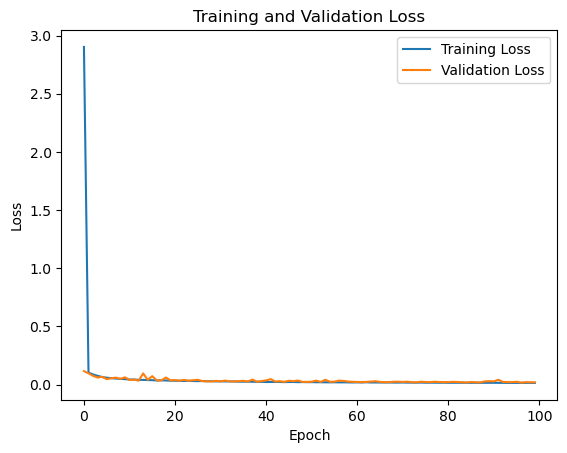

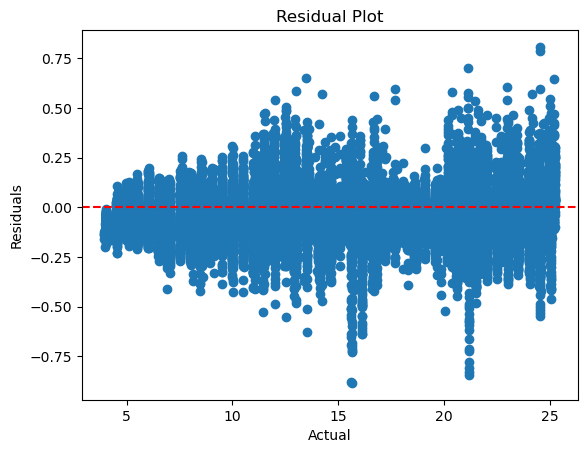

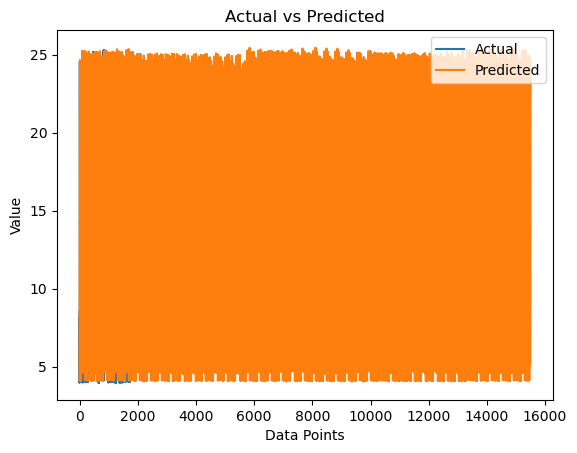

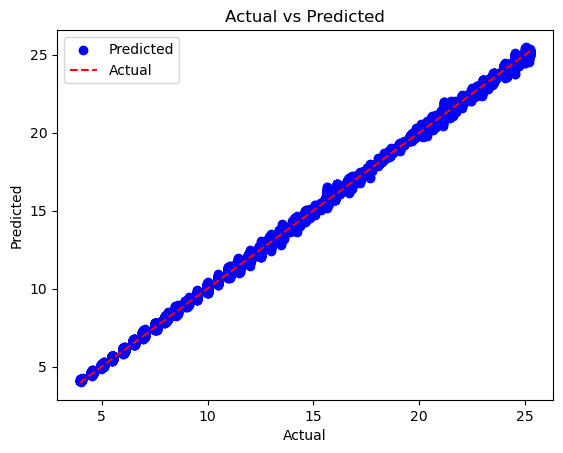

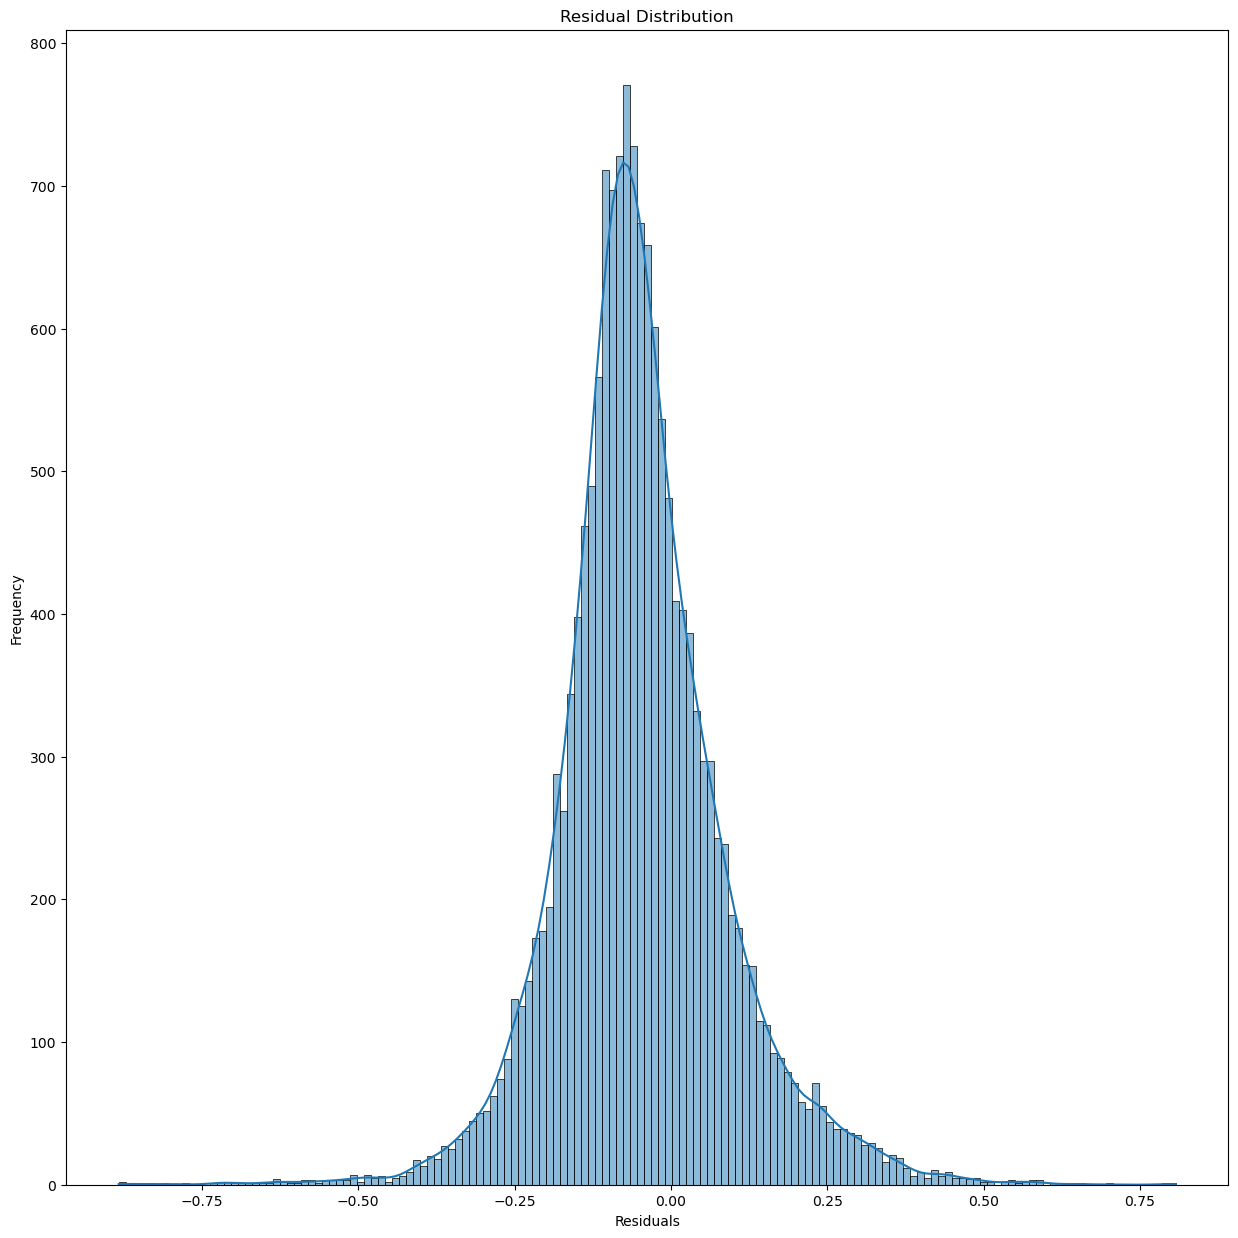

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)
print()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

residuals = np.squeeze(y_test) - np.squeeze(test_predictions)
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(15, 15))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()


In [8]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y
X_train, y_train = split_data(big_train_df, 'yaw_error_mean', columns_to_drop)
X_test, y_test = split_data(big_test_df, 'yaw_error_mean', columns_to_drop)


Epoch 1/100
1940/1940 [==============================] - 3s 1ms/step - loss: 86.2388 - val_loss: 77.7872
Epoch 2/100
1940/1940 [==============================] - 2s 1ms/step - loss: 71.5558 - val_loss: 71.6324
Epoch 3/100
1940/1940 [==============================] - 2s 1ms/step - loss: 63.9989 - val_loss: 61.9624
Epoch 4/100
1940/1940 [==============================] - 2s 1ms/step - loss: 57.1403 - val_loss: 56.2640
Epoch 5/100
1940/1940 [==============================] - 2s 1ms/step - loss: 51.9394 - val_loss: 53.4047
Epoch 6/100
1940/1940 [==============================] - 2s 1ms/step - loss: 48.9752 - val_loss: 51.4470
Epoch 7/100
1940/1940 [==============================] - 2s 1ms/step - loss: 46.5831 - val_loss: 53.8343
Epoch 8/100
1940/1940 [==============================] - 2s 1ms/step - loss: 44.7312 - val_loss: 50.9388
Epoch 9/100
1940/1940 [==============================] - 2s 1ms/step - loss: 43.0609 - val_loss: 46.4351
Epoch 10/100
1940/1940 [==============================]

1940/1940 [==============================] - 2s 1ms/step - loss: 23.8848 - val_loss: 28.3362
Epoch 79/100
1940/1940 [==============================] - 2s 1ms/step - loss: 23.8694 - val_loss: 29.1967
Epoch 80/100
1940/1940 [==============================] - 3s 1ms/step - loss: 23.7917 - val_loss: 29.8648
Epoch 81/100
1940/1940 [==============================] - 2s 1ms/step - loss: 23.6786 - val_loss: 30.3707
Epoch 82/100
1940/1940 [==============================] - 2s 1ms/step - loss: 23.7080 - val_loss: 29.2354
Epoch 83/100
1940/1940 [==============================] - 2s 1ms/step - loss: 23.6370 - val_loss: 28.9978
Epoch 84/100
1940/1940 [==============================] - 2s 1ms/step - loss: 23.5506 - val_loss: 29.7896
Epoch 85/100
1940/1940 [==============================] - 2s 1ms/step - loss: 23.3942 - val_loss: 30.7672
Epoch 86/100
1940/1940 [==============================] - 2s 1ms/step - loss: 23.4886 - val_loss: 28.4719
Epoch 87/100
1940/1940 [==============================] - 2

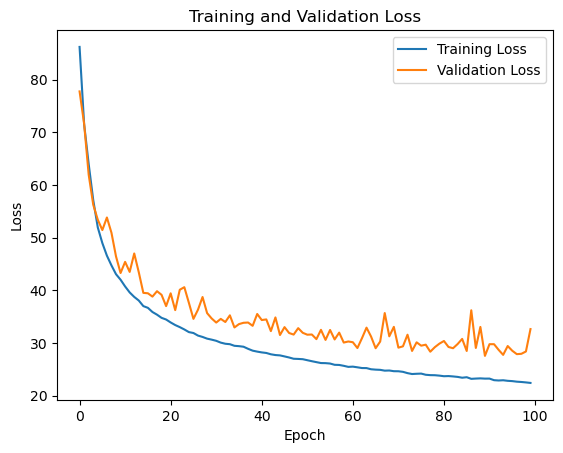

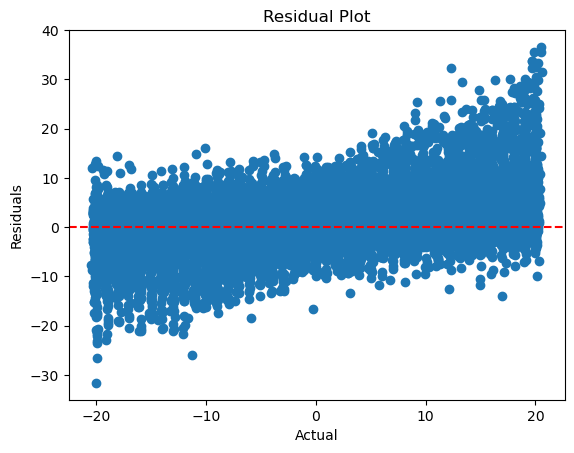

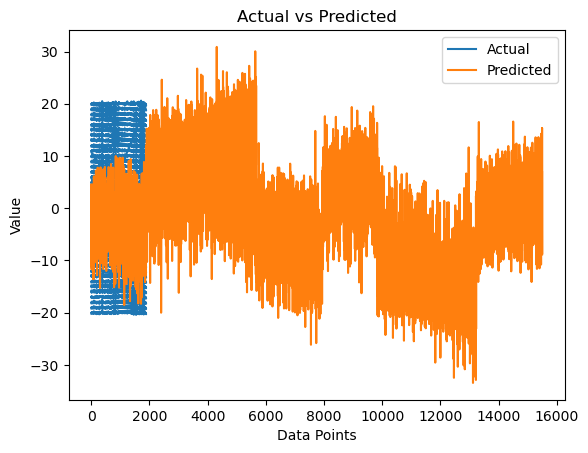

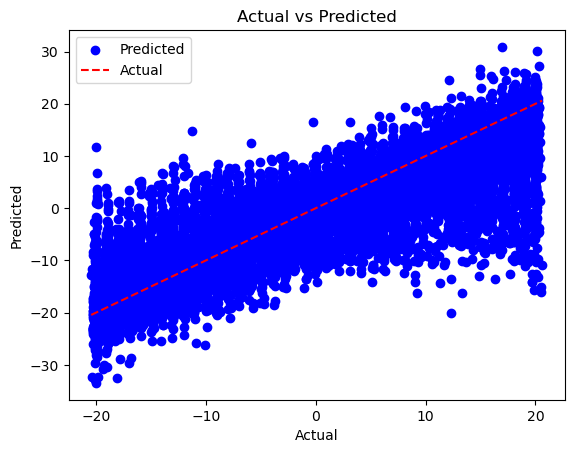

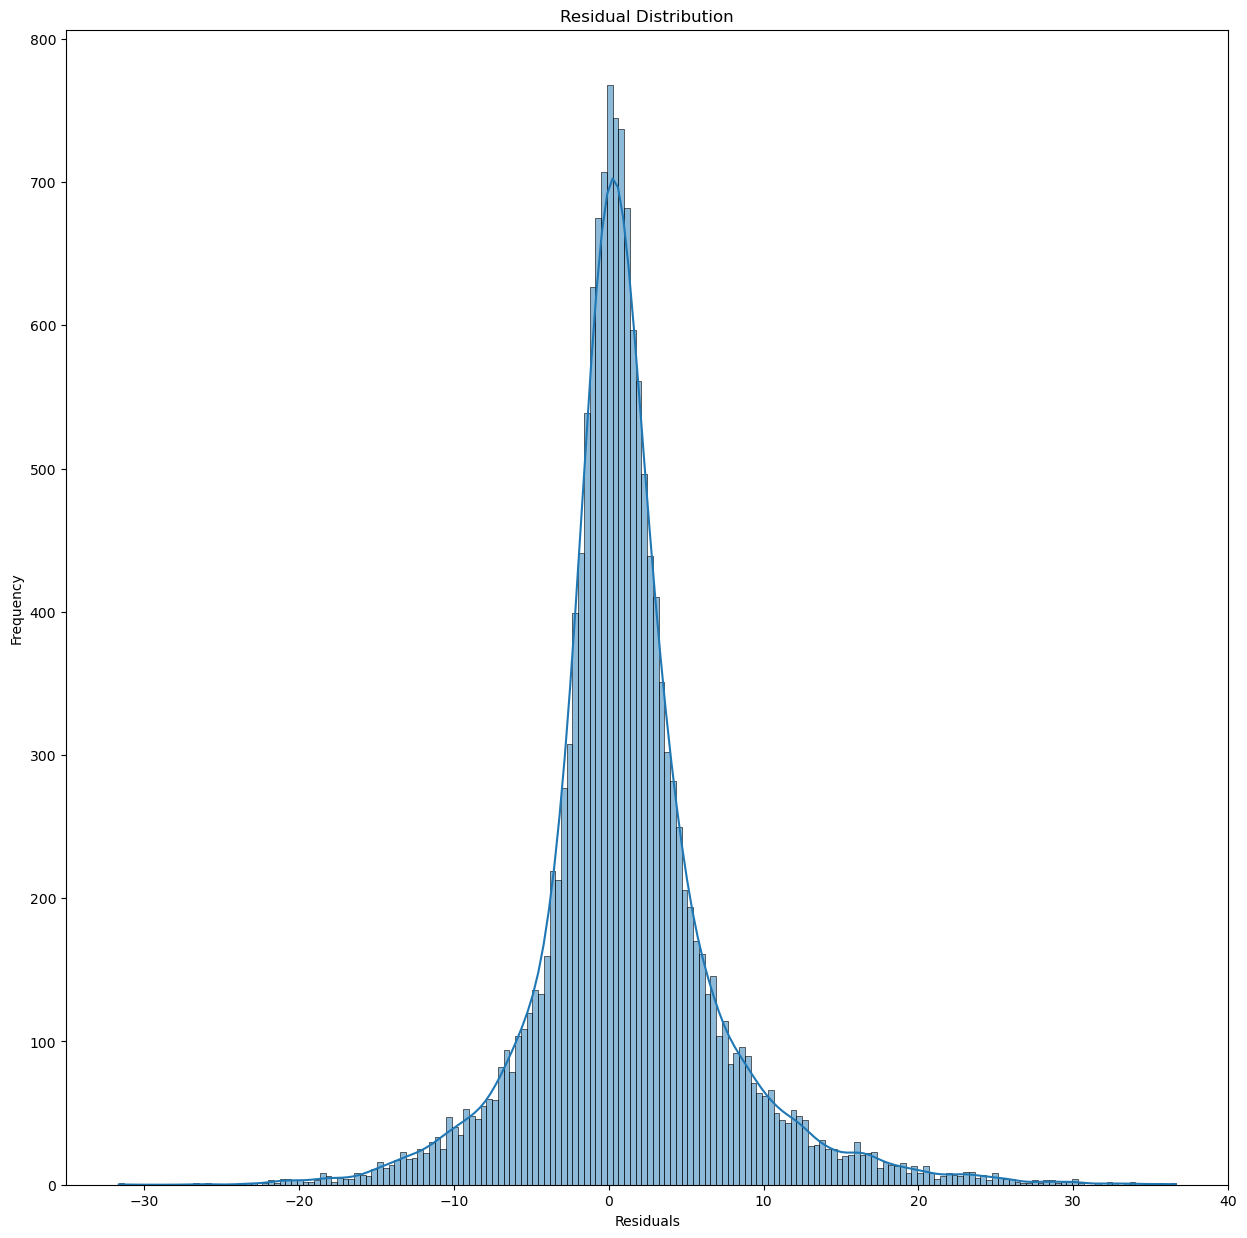

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)
print()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

residuals = np.squeeze(y_test) - np.squeeze(test_predictions)
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(15, 15))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()


In [10]:
def split_data(df, target_variable, columns_to_drop):
    X = df.drop(columns=columns_to_drop, axis=1)
    y = df[target_variable]
    return X, y
X_train, y_train = split_data(big_train_df, 'Turbulence', columns_to_drop)
X_test, y_test = split_data(big_test_df, 'Turbulence', columns_to_drop)


Epoch 1/100
1940/1940 [==============================] - 3s 1ms/step - loss: 0.0032 - val_loss: 2.6070e-04
Epoch 2/100
1940/1940 [==============================] - 3s 1ms/step - loss: 3.1400e-04 - val_loss: 1.5024e-04
Epoch 3/100
1940/1940 [==============================] - 2s 1ms/step - loss: 1.5146e-04 - val_loss: 6.3432e-05
Epoch 4/100
1940/1940 [==============================] - 3s 1ms/step - loss: 6.6921e-05 - val_loss: 4.2594e-05
Epoch 5/100
1940/1940 [==============================] - 3s 2ms/step - loss: 5.5635e-05 - val_loss: 3.3095e-05
Epoch 6/100
1940/1940 [==============================] - 3s 2ms/step - loss: 3.0490e-05 - val_loss: 1.7390e-05
Epoch 7/100
1940/1940 [==============================] - 3s 1ms/step - loss: 2.6852e-05 - val_loss: 1.6842e-05
Epoch 8/100
1940/1940 [==============================] - 3s 1ms/step - loss: 2.1087e-05 - val_loss: 1.4145e-05
Epoch 9/100
1940/1940 [==============================] - 3s 1ms/step - loss: 1.9926e-05 - val_loss: 1.6739e-05
Epoch

1940/1940 [==============================] - 2s 1ms/step - loss: 5.3345e-06 - val_loss: 5.5653e-06
Epoch 75/100
1940/1940 [==============================] - 2s 1ms/step - loss: 5.3302e-06 - val_loss: 7.1139e-06
Epoch 76/100
1940/1940 [==============================] - 2s 1ms/step - loss: 5.2324e-06 - val_loss: 6.2262e-06
Epoch 77/100
1940/1940 [==============================] - 2s 1ms/step - loss: 5.3773e-06 - val_loss: 5.8977e-06
Epoch 78/100
1940/1940 [==============================] - 2s 1ms/step - loss: 5.0571e-06 - val_loss: 6.5125e-06
Epoch 79/100
1940/1940 [==============================] - 2s 1ms/step - loss: 5.2652e-06 - val_loss: 5.0232e-06
Epoch 80/100
1940/1940 [==============================] - 2s 1ms/step - loss: 5.2362e-06 - val_loss: 4.7991e-06
Epoch 81/100
1940/1940 [==============================] - 2s 1ms/step - loss: 5.3302e-06 - val_loss: 5.8679e-06
Epoch 82/100
1940/1940 [==============================] - 2s 1ms/step - loss: 5.1534e-06 - val_loss: 6.1747e-06
Epoch

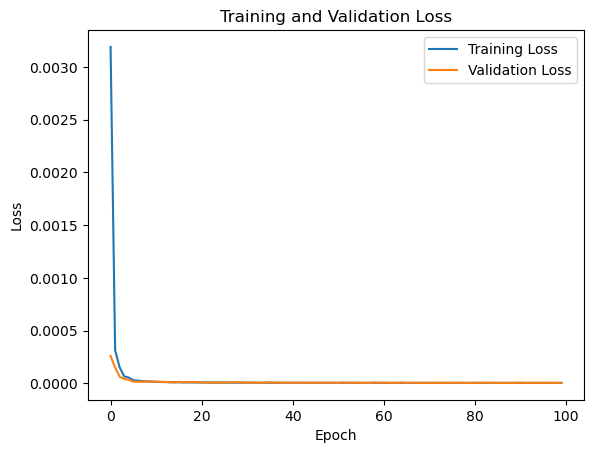

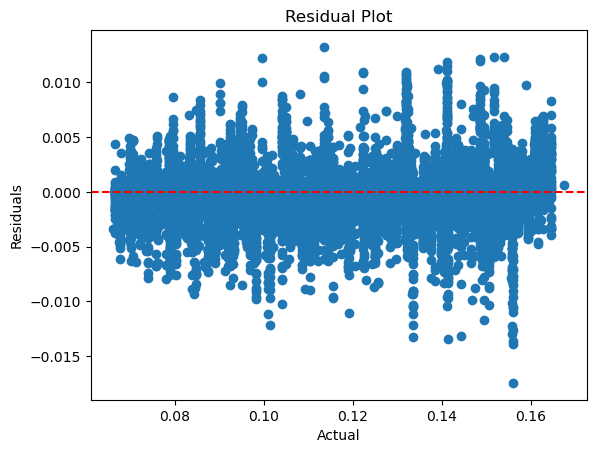

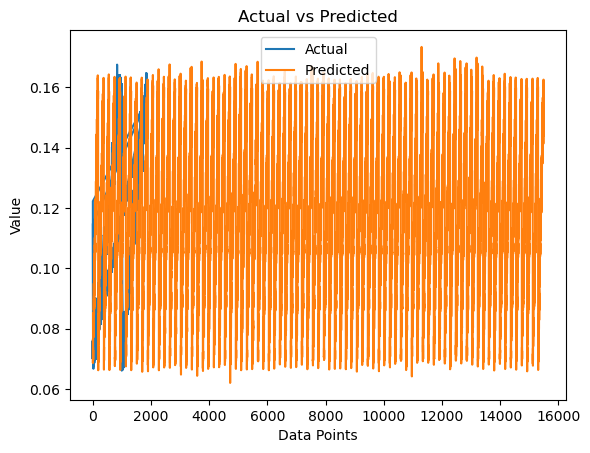

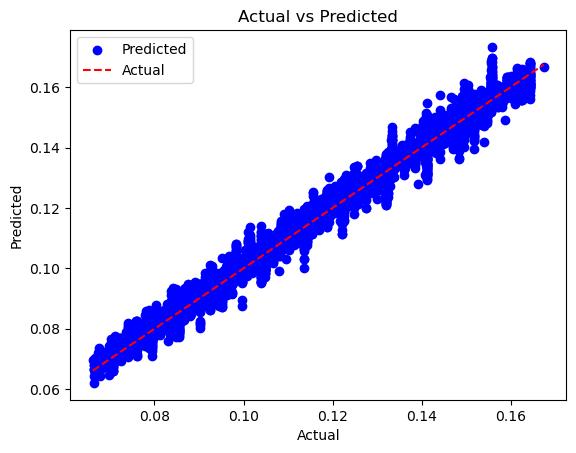

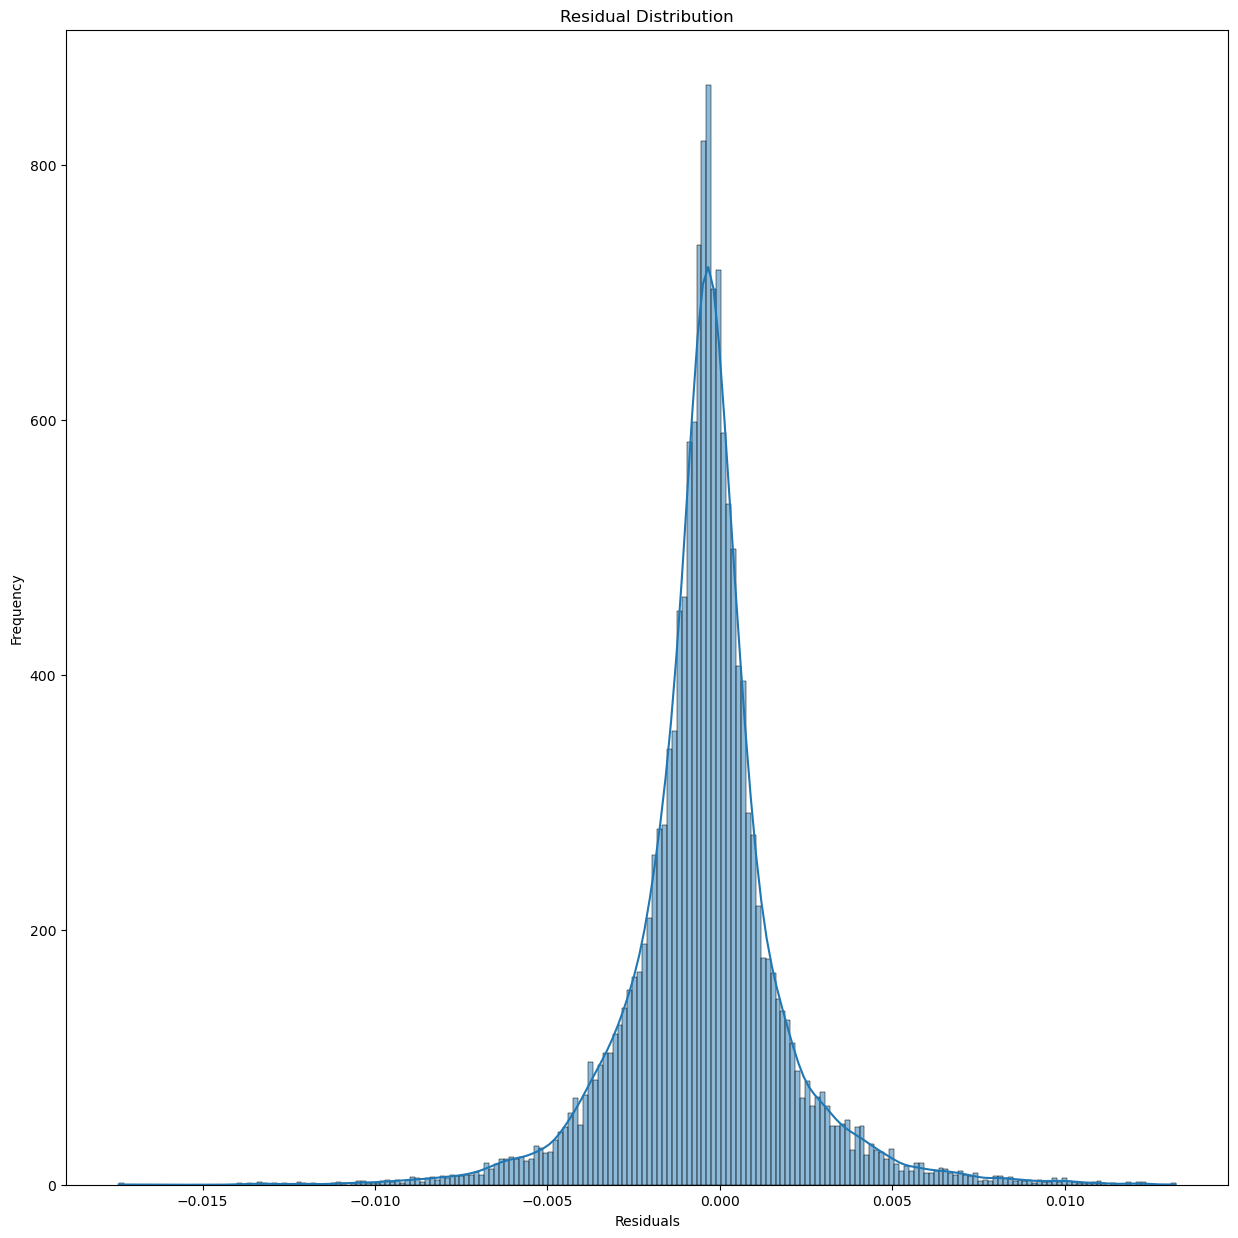

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print()
print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)
print()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

residuals = np.squeeze(y_test) - np.squeeze(test_predictions)
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

plt.scatter(y_test, test_predictions, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

plt.figure(figsize=(15, 15))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()
